## Snowdepth processing

Data is a mixture of corrected and uncorrected data

The uncorrected data is marked with _cm and the corrected data is marked with corr

In [1]:
import seaborn as sns
import glob as glob

In [2]:
def dtparse(df):
    
    year = df.Year
    doy = df.DOY
    time = df.Hour
    
    time = str(int(time))
    doy = str(int(doy))
    year = str(int(year))
    
    if len(str(time)) == 3:
        time = '0'+time # add a leading zero
        h = int(time[0:2]) # pull out hour
        m = int(time[2:4]) # pull out minutes
    if len(str(time)) == 4:
        h = int(time[0:2]) # pull out hour
        m = int(time[2:4]) # pull out minutes
        
    if h == 24:
        doy = int(doy) + 1
        h = 0
    return str(pd.datetime.strptime('%s %s %s %s'%(year,doy,h,m),'%Y %j %H %M'))

In [3]:
def genDateTime(x):
    year = x.YEAR
    doy = x.DOY
    
    if np.isnan(year) | np.isnan(doy):
        return np.NaN
    else:
        year = int(year)
        hours = int(round(((doy - np.floor(doy))*24.),0))
        doy = int(np.floor(doy))
        date = "%s-%s %s:00"%(year,doy,hours)
        return str(pd.datetime.strptime(date,"%Y-%j %H:00"))

In [4]:
wy = pd.read_excel('./data/jemez_snow_depth/nms_wy2005_snow_sensor_data.xlsx')
wy = wy.iloc[0:-1] # drop the last line

wy['dt'] = wy.apply(dtparse,axis=1)

wy.index = pd.DatetimeIndex(wy.dt)
del wy['dt']

wy2 = wy[['depth1_corr','depth4_corr','depth6_corr']]
wy2.columns = ['sd1','sd4','sd6']

In [5]:
wy2.to_pickle('./data/jemez_snow_depth/jemez_snowdepth_wy2005_clean_open.pcl')

In [6]:
wy = pd.read_excel('./data/jemez_snow_depth/nms_wy2006_snow_sensor_data.xlsx',sheetname='jan1-end')
wy['YEAR'] = 2006
wy = wy.iloc[0:-1] # drop the last line

wy['dt'] = wy.apply(genDateTime,axis=1)

wy.index = pd.DatetimeIndex(wy.dt)
del wy['dt']

wy2 = wy[['depth 1.1','depth 4.1','depth 6.1']]
wy2.columns = ['sd1','sd4','sd6']

In [7]:
wy2.to_pickle('./data/jemez_snow_depth/jemez_snowdepth_wy2006_clean_open.pcl')

In [8]:
wy = pd.read_excel('./data/jemez_snow_depth/nms_wy2007_snow_sensor_data.xlsx')
wy = wy.iloc[0:-1] # drop the last line
wy = wy.iloc[0:-2]
wy['dt'] = wy.apply(dtparse,axis=1)

wy.index = pd.DatetimeIndex(wy.dt)
del wy['dt']

wy2 = wy[['depth1Cor','depth4cor','depth6cor']]
wy2.columns = ['sd1','sd4','sd6']

In [9]:
wy2.to_pickle('./data/jemez_snow_depth/jemez_snowdepth_wy2007_clean_open.pcl')

In [10]:
wy = pd.read_excel('./data/jemez_snow_depth/nms_wy2008_snow_sensor_data.xlsx')

wy = wy.iloc[0:-1] # drop the last line

wy['dt'] = wy.apply(genDateTime,axis=1)

wy.index = pd.DatetimeIndex(wy.dt)
del wy['dt']

#wy2 = wy.iloc[[3,9,13]]

wy2 = pd.DataFrame({'sd1':wy.iloc[:,4],'sd4':wy.iloc[:,10],'sd6':wy.iloc[:,14]})

In [11]:
wy2.to_pickle('./data/jemez_snow_depth/jemez_snowdepth_wy2008_clean_open.pcl')

In [12]:
wy = pd.read_excel('./data/jemez_snow_depth/nms_wy2009_snow_sensor_data.xlsx')

wy = wy.iloc[0:-1] # drop the last line

wy['dt'] = wy.apply(genDateTime,axis=1)

wy.index = pd.DatetimeIndex(wy.dt)
del wy['dt']

#wy2 = wy.iloc[[3,9,13]]

wy2 = pd.DataFrame({'sd1':wy.iloc[:,4],'sd4':wy.iloc[:,10],'sd6':wy.iloc[:,14]})

In [13]:
wy2.to_pickle('./data/jemez_snow_depth/jemez_snowdepth_wy2009_clean_open.pcl')

In [14]:
wy = pd.read_excel('./data/jemez_snow_depth/nms_wy2010_snow_sensor_data.xlsx')

wy = wy.iloc[0:-1] # drop the last line

wy['dt'] = wy.apply(genDateTime,axis=1)

wy.index = pd.DatetimeIndex(wy.dt)
del wy['dt']

#wy2 = wy.iloc[[3,9,13]]

wy2 = pd.DataFrame({'sd1':wy.iloc[:,4],'sd4':wy.iloc[:,10],'sd6':wy.iloc[:,14]})

In [15]:
wy2.to_pickle('./data/jemez_snow_depth/jemez_snowdepth_wy2010_clean_open.pcl')

## Merge the data frames into one

In [16]:
files = glob.glob('./data/jemez_snow_depth/*.pcl')

In [17]:
dat = pd.DataFrame()

for fl in files:
    tmp = pd.read_pickle(fl)
    dat = dat.append(tmp)
    

In [18]:
dat.sort_index(axis=1, inplace=True)

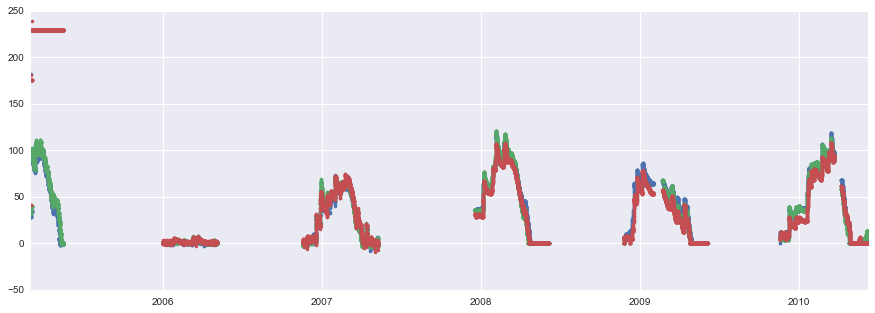

In [20]:
plt.figure(figsize=(15,5))
plt.plot(dat,'.')

In [21]:
dat.to_pickle('./data/jemez_snow_depth/wy2005_2010_clean_open.pcl')